<a href="https://colab.research.google.com/github/gulmert89/dsBootcamp/blob/master/odev114_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ödev 11.4 - Derin Öğrenmeye Giriş: Convolutional Neural Network (CNN) Modelleri

**Soru:** 100 tane farklı sınıfa ait 32x32 boyutlarında resimlerin olduğu CIFAR-100 veri kümesini kullanarak CNN modeli geliştirin. Modelin doğruluk değerini 0.95'in üzerine çıkarmaya çalışın. Bunun için epoch sayısını, konvolüsyon ve dense katmalarının sayısını, kernel boyutlarını, filtre sayısını, padding ve stride değerlerini değiştirebilirsiniz.

Veri kümesini <code>from keras.datasets import cifar100</code> komutu ile indirebilirsiniz.

---

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import cifar100
from keras.utils import to_categorical
from keras import models, layers
%matplotlib inline

In [18]:
help(cifar100.load_data)

Help on function load_data in module tensorflow.python.keras.datasets.cifar100:

load_data(label_mode='fine')
    Loads [CIFAR100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).
    
    This is a dataset of 50,000 32x32 color training images and
    10,000 test images, labeled over 100 fine-grained classes that are
    grouped into 20 coarse-grained classes. See more info at the
    [CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html).
    
    Arguments:
        label_mode: one of "fine", "coarse". If it is "fine" the category labels
        are the fine-grained labels, if it is "coarse" the output labels are the
        coarse-grained superclasses.
    
    Returns:
        Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
    
        **x_train, x_test**: uint8 arrays of RGB image data with shape
          `(num_samples, 3, 32, 32)` if `tf.keras.backend.image_data_format()` is
          `'channels_first'`, or `(num_samples, 32, 32, 3)` if the data forma

In [3]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 4s 0us/step


In [22]:
print("--- Shape of the dataset---")
print("X_train:", X_train.shape, "\nX_test :", X_test.shape)
print("y_train:", y_train.shape, "\ny_test :", y_test.shape)

--- Shape of the dataset---
X_train: (50000, 32, 32, 3) 
X_test : (10000, 32, 32, 3)
y_train: (50000, 1) 
y_test : (10000, 1)


In [52]:
coarse_label = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 
                'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 
                'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 
                'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 
                'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 
                'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
                'house', 'kangaroo', 'computer_keyboard', 'lamp', 'lawn_mower', 
                'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 
                'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 
                'orange', 'orchid', 'otter', 'palm_tree', 'pear', 
                'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 
                'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 
                'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 
                'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 
                'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 
                'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
                'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 
                'woman', 'worm'] 

mapping = {
'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
'food containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
'fruit and vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
'household electrical device': ['clock', 'computer_keyboard', 
                                'lamp', 'telephone', 'television'],
'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
'large man-made outdoor things': ['bridge', 'castle', 'house', 
                                  'road', 'skyscraper'],
'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 
                                   'elephant', 'kangaroo'],
'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
'people': ['baby', 'boy', 'girl', 'man', 'woman'],
'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
'vehicles 2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor'],
}

label_dict = dict()
for i in range(len(coarse_label)):
    label_dict[i] = coarse_label[i]

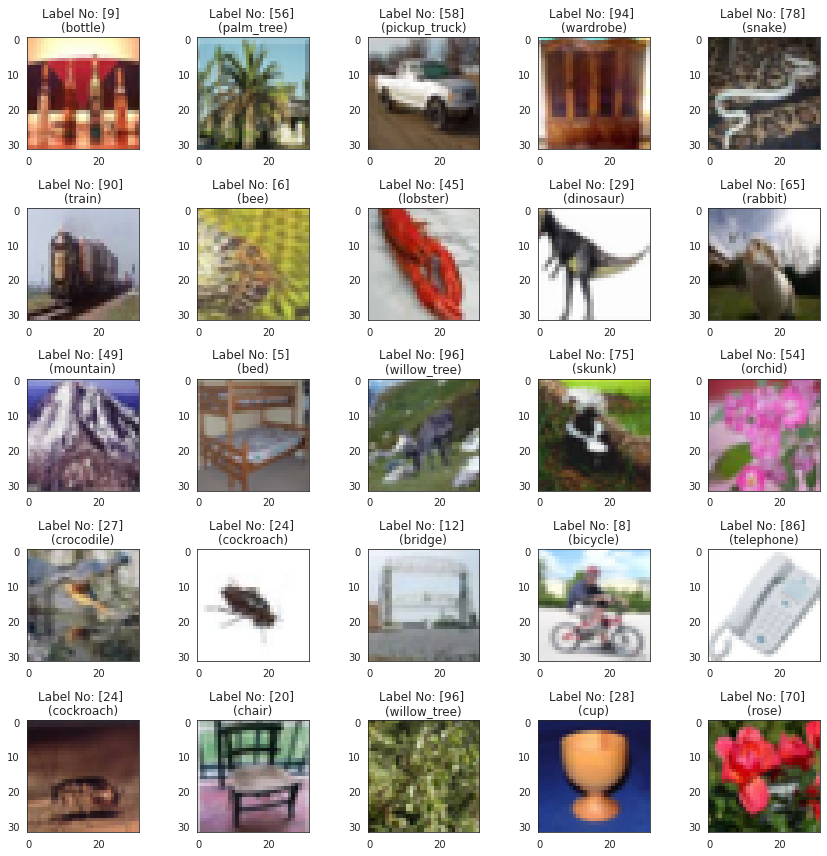

In [82]:
# 25 random images are shown below
sns.set_style(style="white")
plt.figure(figsize=(12,12))
for num, img in enumerate(np.random.randint(0, X_train.shape[0], 25)):
    plt.subplot(5, 5, num+1)
    plt.imshow(X_train[img])
    plt.title(f"Label No: {y_train[img]} \n({label_dict[y_train[img][0]]})")
plt.tight_layout()
# plt.axis("off")
plt.show()